# Last.Fm music industry data set

## The problem statement I am choosing is to identify the top genere in music industry currently, measured by the metric of "number of listeners" only

In [125]:
#importing all the required modules
import io
import json
import requests
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import table
import plotly.plotly as py

In [42]:
#importing top 1000 artists in the world currently

top_artists = urllib.request.urlopen('http://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key=db79a65a2c6d7623dd05d5137df22b43&format=json&limit=1000')

In [43]:
result = top_artists.read()
type(result)

bytes

In [4]:
result_object = json.loads(result)
type(result_object)

dict

In [5]:
result_object["artists"]["artist"][1]["name"]

'Drake'

In [6]:
#creating lists of required data values from dictionary
list_1=[]
for i in range(999):
    list_1.append(result_object["artists"]["artist"][i]["name"])
    
list_2=[]
for j in range(999):
    list_2.append(result_object["artists"]["artist"][j]["playcount"])
    
list_3=[]
for k in range(999):
    list_3.append(result_object["artists"]["artist"][k]["listeners"])

In [85]:
#combining the lists to form a data frame
a=pd.DataFrame(list_1)
b=pd.DataFrame(list_2)
c=pd.DataFrame(list_3)
data_artist = pd.concat([a,b,c],axis=1)
data_artist.columns = ['Artist_Name','Play_count','Listeners']
pd.isnull(data_artist).sum()

Artist_Name    0
Play_count     0
Listeners      0
dtype: int64

In [ ]:
# Saving a copy of the data in local

In [118]:
data_artist.to_csv("data_artist.csv",sep=',',index= False)
Data_artist = pd.read_csv('data_artist.csv',encoding="ISO-8859-1")


In [110]:
#data_artist is a data frame containg artist information
Data_artist.head()

Artist_Name  Play_count  Listeners
0   Kendrick Lamar    85132273    1326455
1            Drake   118574690    3208276
2        Radiohead   478935686    4626369
3       The Weeknd    63298897    1130809
4  Imagine Dragons    68260275    1520213

In [9]:
data_artist.describe()

Artist_Name Play_count Listeners
count          999        999       999
unique         999        999       999
top      Lil Dicky   12556171    239008
freq             1          1         1

##### The missing information here is the genere/tag that each artist belongs to, in order to solve out problem statement which is to identify which genere has the highest number of listeners.

In [11]:
artist = list(data_artist.Artist_Name)

In [16]:
#passsing top 1000 artists obtained from the first api in order obatin the information regarding the genere that each artist
#belong to
my_list=[]
for i in range(999):
    print(i) 
    url=("http://ws.audioscrobbler.com/2.0/?method=artist.gettoptags&artist="+artist[i]+"&api_key=db79a65a2c6d7623dd05d5137df22b43&format=json")
    a=requests.get(url).content
    my_list.append(a)
    
#This code takes time, hence printing "i" to see how far the code has run
  

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [18]:
my_list[1]

b'{"toptags":{"tag":[{"count":100,"name":"Hip-Hop","url":"https://www.last.fm/tag/Hip-Hop"},{"count":71,"name":"rap","url":"https://www.last.fm/tag/rap"},{"count":49,"name":"rnb","url":"https://www.last.fm/tag/rnb"},{"count":37,"name":"hip hop","url":"https://www.last.fm/tag/hip+hop"},{"count":37,"name":"Canadian","url":"https://www.last.fm/tag/Canadian"},{"count":16,"name":"Drake","url":"https://www.last.fm/tag/Drake"},{"count":8,"name":"seen live","url":"https://www.last.fm/tag/seen+live"},{"count":7,"name":"r&b","url":"https://www.last.fm/tag/r&b"},{"count":6,"name":"pop","url":"https://www.last.fm/tag/pop"},{"count":5,"name":"young money","url":"https://www.last.fm/tag/young+money"},{"count":5,"name":"male vocalists","url":"https://www.last.fm/tag/male+vocalists"},{"count":4,"name":"indie","url":"https://www.last.fm/tag/indie"},{"count":4,"name":"canada","url":"https://www.last.fm/tag/canada"},{"count":4,"name":"toronto","url":"https://www.last.fm/tag/toronto"},{"count":3,"name":"d

In [19]:
new_list=[]
for i in range(999):
    tags_data= json.loads(my_list[i])
    new_list.append(tags_data["toptags"]["tag"][0])
    

In [20]:
tags_list=[]
for i in range(999):
    tags_list.append(new_list[i]["name"])

In [111]:
tags_df = pd.DataFrame(tags_list)
artist_df = pd.DataFrame(artist)
artist_tag_df = pd.concat([artist_df,tags_df],axis=1)
artist_tag_df.columns =['Artist_Name','Tag']

In [112]:
# Saving a copy of the data in local
artist_tag_df.to_csv("artist_tag_df.csv",sep=',',index= False)
Artist_tag_df = pd.read_csv('artist_tag_df.csv',encoding="ISO-8859-1")
Artist_tag_df.head()

Artist_Name          Tag
0   Kendrick Lamar      Hip-Hop
1            Drake      Hip-Hop
2        Radiohead  alternative
3       The Weeknd          rnb
4  Imagine Dragons        indie

In [113]:
pd.isnull(Artist_tag_df).sum()

Artist_Name    0
Tag            0
dtype: int64

In [114]:
#Now the data is complete with the tag informamtion
final_data = pd.merge(Data_artist,artist_tag_df,on='Artist_Name')
final_data.head(3)

Artist_Name  Play_count  Listeners          Tag
0  Kendrick Lamar    85132273    1326455      Hip-Hop
1           Drake   118574690    3208276      Hip-Hop
2       Radiohead   478935686    4626369  alternative

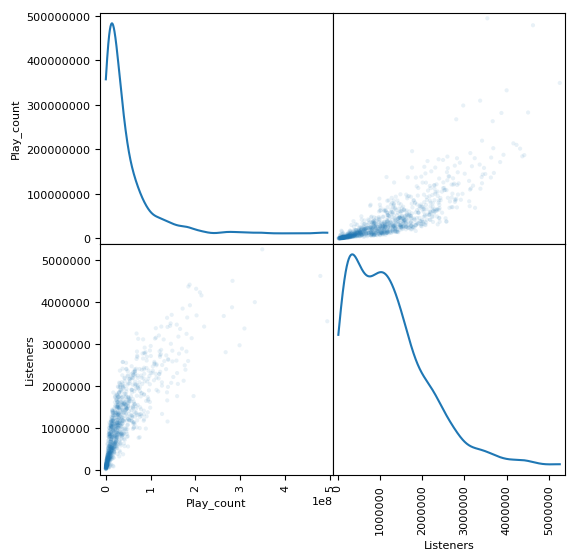

In [137]:
from pandas.plotting import scatter_matrix
scatter_matrix(final_data, alpha=0.1, figsize=(6, 6), diagonal='kde')
plt.show()

In [24]:
#converting columns to numeric type for aggregation
final_data.Listeners=final_data.Listeners.astype(float)
final_data.Play_count= final_data.Play_count.astype(float)

In [88]:
pd.DataFrame.describe(final_data)

Play_count     Listeners
count  9.990000e+02  9.990000e+02
mean   3.976106e+07  1.168335e+06
std    5.046597e+07  8.789037e+05
min    1.959130e+05  1.859400e+04
25%    9.350329e+06  4.501540e+05
50%    2.432155e+07  1.039639e+06
75%    4.965266e+07  1.631556e+06
max    4.944443e+08  5.260566e+06

In [89]:
final_data['Tag'].nunique()

116

In [ ]:
### Creating subsets of data to plot graphs

In [90]:
graph_data_tag= pd.DataFrame({'Tag_freq': final_data.groupby('Tag')['Tag'].size()}).reset_index()
graph_data_tag = graph_data_tag.sort_values(by=['Tag_freq'],ascending=[False])
graph_data_tag= graph_data_tag.head(7)
graph_data_tag

Tag  Tag_freq
9         Hip-Hop        94
88            pop        93
52     electronic        89
64          indie        82
101          rock        69
38   classic rock        47
108          soul        30

In [91]:
graph_data_listeners= pd.DataFrame({'Sum_of_Listeners': final_data.groupby('Tag')['Listeners'].sum()}).reset_index()
graph_data_listeners = graph_data_listeners.sort_values(by=['Sum_of_Listeners'],ascending=[False])
graph_data_listeners= graph_data_listeners.head(7)
graph_data_listeners

Tag  Sum_of_Listeners
101          rock       131466549.0
88            pop       111724085.0
64          indie       108030957.0
9         Hip-Hop        89126196.0
38   classic rock        78228788.0
52     electronic        77929293.0
108          soul        31003631.0

In [92]:
graph_data_play_count =pd.DataFrame({'Sum_of_play_count': final_data.groupby('Tag')['Play_count'].sum()}).reset_index()
graph_data_play_count = graph_data_play_count.sort_values(by=['Sum_of_play_count'],ascending=[False])
graph_data_play_count= graph_data_play_count.head(7)
graph_data_play_count

Tag  Sum_of_play_count
101              rock       4.412662e+09
64              indie       4.285485e+09
88                pop       3.301313e+09
52         electronic       2.559019e+09
38       classic rock       2.266835e+09
9             Hip-Hop       2.213589e+09
27   alternative rock       1.125039e+09

In [93]:
import matplotlib
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 8})

In [94]:
x= np.arange(len(graph_data_tag.Tag))
y= graph_data_tag.Tag_freq

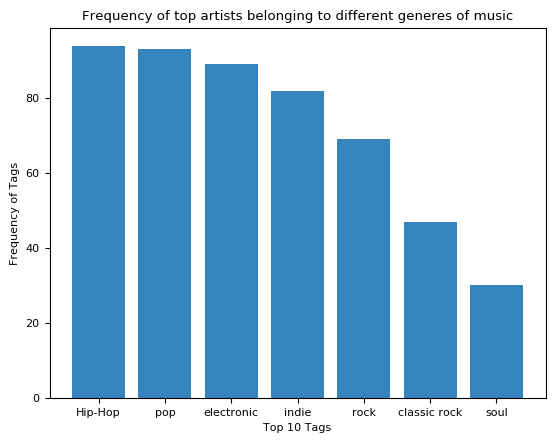

In [95]:
plt.bar(x,y,align='center', alpha=0.9)
plt.ylabel('Frequency of Tags')
plt.xlabel('Top 10 Tags')
plt.xticks(x,graph_data_tag.Tag)
plt.title('Frequency of top artists belonging to different generes of music')
plt.show()

### From the above graph, we can say that, hip hop, pop and electronic have the maximum artists in the top 1000 artists in the world

#### Now I want to check if this really reflects on the music industry, i.e whether hip hop and pop are the top generes in the music industry or not (in terms of listeners alone). To validate my result, following analysis is done 

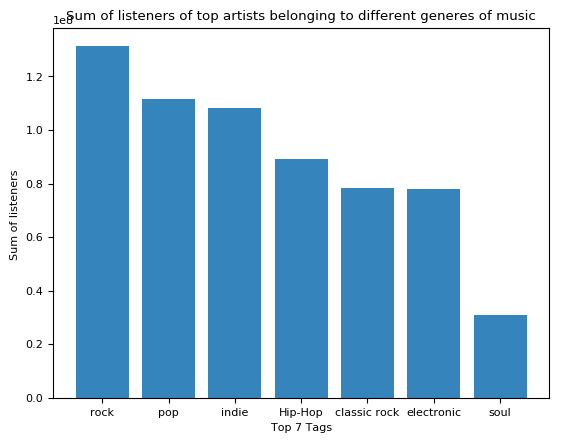

In [96]:


x= np.arange(len(graph_data_listeners.Tag))
y= graph_data_listeners.Sum_of_Listeners
plt.bar(x,y,align='center', alpha=0.9)
plt.ylabel('Sum of listeners ')
plt.xlabel('Top 7 Tags')
plt.xticks(x,graph_data_listeners.Tag)
plt.title('Sum of listeners of top artists belonging to different generes of music')
plt.show()

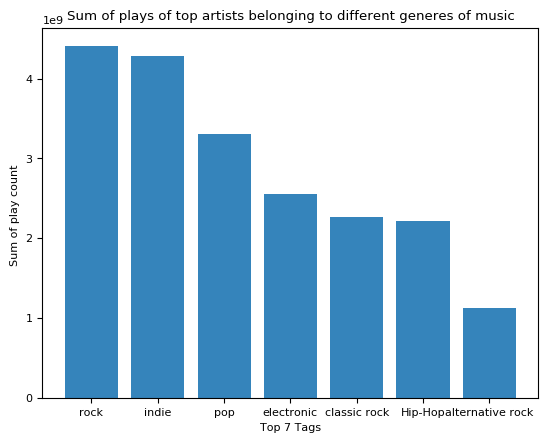

In [97]:
x= np.arange(len(graph_data_play_count.Tag))
y= graph_data_play_count.Sum_of_play_count
plt.bar(x,y,align='center', alpha=0.9)
plt.ylabel('Sum of play count ')
plt.xlabel('Top 7 Tags')
plt.xticks(x,graph_data_play_count.Tag)
plt.title('Sum of plays of top artists belonging to different generes of music')
plt.show()

#### From the above graphs , it is evident that, Rock music is the most "listened to" even though the top ranked artists belong to hip hop and pop generes


# To further validate my result, i am getting another data set, which only contains top tags in world from last.fm

In [98]:
top_tags = urllib.request.urlopen('http://ws.audioscrobbler.com/2.0/?method=tag.getTopTags&api_key=db79a65a2c6d7623dd05d5137df22b43&format=json')
top_tags= top_tags.read()
top_tags_object = json.loads(top_tags)

In [99]:
list_4=[]
for i in range(50):
    list_4.append(top_tags_object["toptags"]["tag"][i]["name"])
    
list_5=[]
for j in range(50):
    list_5.append(top_tags_object["toptags"]["tag"][j]["count"])
    
list_6=[]
for k in range(50):
    list_6.append(top_tags_object["toptags"]["tag"][k]["reach"])

In [100]:
e=pd.DataFrame(list_4)
f=pd.DataFrame(list_5)
g=pd.DataFrame(list_6)
top_tags_final = pd.concat([e,f,g],axis=1)
top_tags_final.columns = ['Tag_Name','Count','Reach']

In [119]:
# Saving a copy of the data in local
top_tags_final.to_csv("top_tags_final.csv",sep=',',index= False)
top_tags_final = pd.read_csv('top_tags_final.csv',encoding="ISO-8859-1")

In [116]:
top_tags_final=top_tags_final.head(17)

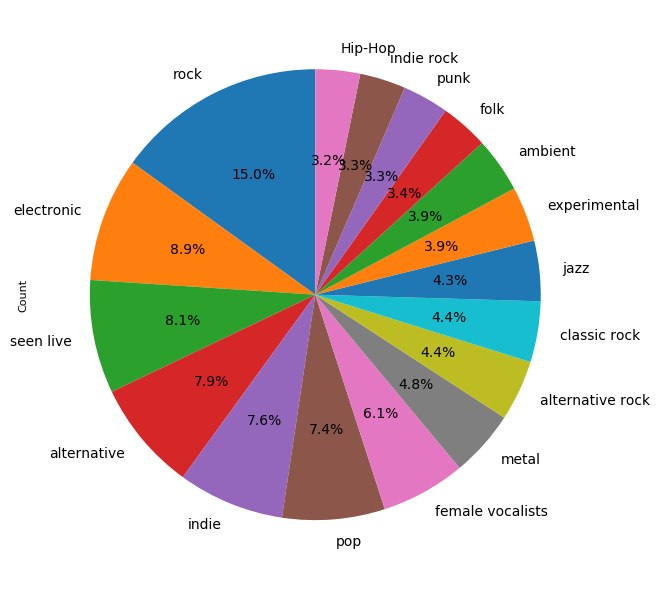

In [117]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
top_tags_final.plot(kind='pie', y = 'Count', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, labels=top_tags_final['Tag_Name'], legend = False, fontsize=10)
plt.show()

### Here we see that rock has 15% of total listeners while hip hop has just 3.2%. This might be because, hip hop tag count would have gotten split in "female vocalists" and "seen live".  

# But from the whole analysis we can take a stand and say Rock has the highest number of listeners 

### Some ideas for further analysis
#### 1. Demographic analysis can be done to understand what age group listens to rock and compare it with the age group that listens to pop or hiphop
#### 2. Ethnic groups and their affiliation to different music generes 
#### 3. Prescribing music based on Age, Ethnicity and Location of a person 
